# Týden 7. Strojové učení s dohledem.

Učení s dohledem je typ strojového učení, kdy je model trénován na označených datech. Model provádí předpovědi nebo rozhodnutí na základě vstupních dat a je opravován, pokud jsou jeho předpovědi nesprávné.

Klíčové vlastnosti:
- Označená data: Trénovací data obsahují jak vstupní data, tak odpovídající očekávaný výstup.
- Fáze trénování: Algoritmus se učí z trénovacích dat minimalizací ztrátové funkce.
- Fáze testování: Model je vyhodnocen na jiné sadě označených dat, aby se otestovala jeho přesnost predikce.
- Výstupní proměnná (cíl): Cílem je předpovědět výstupní proměnnou na základě jedné nebo více vstupních funkcí.
- Typy problémů: Obecně se používají pro klasifikační a regresní problémy.

V tomto cvičení vyzkoušíme několik modelů učení pod dohledem pomocí balíčku Scikit-learn.

### Pip

```
pip install -U scikit-learn
```

### Conda

```
conda create -n sklearn-env -c conda-forge scikit-learn
conda activate sklearn-env
```

## Lineární regrese

Lineární regrese fituje lineární model s koeficienty $w = (w_1, \dots, w_p)$
tak, aby minimalizoval reziduální součet čtverců mezi pozorovanými cíli v souboru dat a cíli předpovězenými lineární aproximací. Matematicky řeší problém ve tvaru:
$$\min_{w}||Xw-y||_2^2$$

Nejdřív z balíčku sklearn naimportujeme potřebné funkce a taky numpy a matplotlib:

In [17]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

Otestujeme to na námi vytvořených datech, které vytvoříme tak, že k lineárnímu trendu přičteme Gaussův šum:

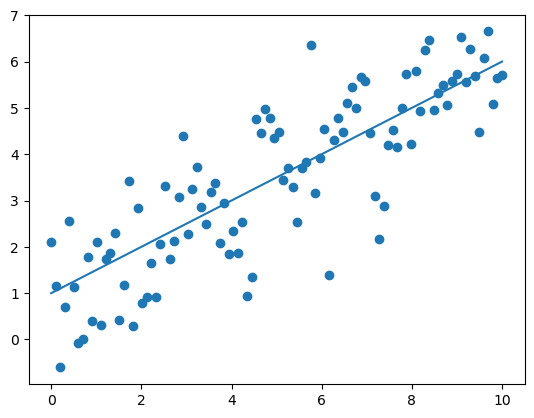

In [35]:
x = np.linspace(0, 10, 100).reshape(-1, 1)
y_truth = 1 + 0.5 * x 
y_noise = y_truth + np.random.randn(100, 1)

plt.plot(x, y_truth)
plt.scatter(x, y_noise)

Nejdřive náhodně rozdělíme data na trénovácí a testovácí:

In [38]:
x_train, x_test, y_train, y_test = train_test_split(x, y_noise, test_size=0.2, random_state=42)

Vytvoříme objekt lineární regrese a trénujeme model pomocí trénovacích sady:

In [39]:
model = linear_model.LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

print("Coefficients: \n", model.coef_)
print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print("Coefficient of determination: %.2f" % r2_score(y_test, y_pred))

Coefficients: 
 [[0.53929262]]
Mean squared error: 1.07
Coefficient of determination: 0.63


Nakreslíme předpověď testovacích dat:

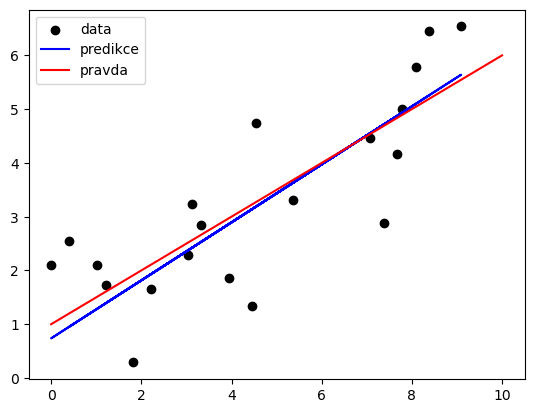

In [42]:
plt.scatter(x_test, y_test, color="black")
plt.plot(x_test, y_pred, color="blue")
plt.plot(x, y_truth, color="red")
plt.legend(['data', 'predikce', 'pravda'])

## Logistická regrese

Logistická regrese je metoda matematické statistiky, která odhaduje pravděpodobnost nějakého jevu na základě určitých známých skutečností, které mohou ovlivnit výskyt jevu. 

Jako jednoduchý příklad můžeme použít logistickou regresi s jednou vysvětlující proměnnou a dvěma kategoriemi k zodpovězení následující otázky:

 - Skupina 20 studentů stráví studiem na zkoušku 0 až 6 hodin. Jak ovlivňuje počet hodin strávených studiem pravděpodobnost, že student zkoušku složí?

Důvodem pro použití logistické regrese pro tento problém je to, že hodnoty závislé proměnné, splnil a nesplnil, jsou sice reprezentovány "1" a "0", ale nejsou to kardinální čísla. Pokud by se problém změnil tak, že by se hodnoty "prospěl/neprospěl" nahradily známkami 0-100 (kardinálními čísly), bylo by možné použít jednoduchou regresní analýzu.

Mějme počet hodin, které každý student věnoval studiu, a zda zkoušku složil (1) nebo nesložil (0).

In [53]:
hours = [0.50, 0.75, 1.00, 1.25, 1.50, 1.75, 1.75, 2.00, 2.25, 2.50, 2.75, 3.00, 3.25, 3.50, 4.00, 4.25, 4.50, 4.75, 5.00, 5.50]
passed = [0, 0, 0, 0, 0, 0,	1, 0, 1, 0,	1, 0, 1, 0,	1, 1, 1, 1,	1, 1]

Logistická funkce má tvar:
$$p(x)=\frac{1}{1+e^{-(x-\mu)/s}}$$
kde $\mu$ je parametr polohy (střed křivky, kde $p(\mu)=0.5$) a $s$ je parametr měřítka.
Obvyklá míra přesnosti logistické regrese používá logistickou ztrátu, zápornou logaritmickou pravděpodobnost. Pro dané $x_k$ a $y_k$ pišme $p_k=p(x_k)$. $p_k$ je pravděpodobnost, že příslušné $y_k$ bude $1$ a $1-p_k$ je pravděpodobnost, že $y_k = 0$ (Bernoulliho rozdělení).
Na rozdíl od lineární regrese, kde model může mít nulovou ztrátu v bodě, pokud prochází datovým bodem (a nulovou ztrátu celkově, pokud všechny body leží na přímce), v logistické regresi není možné mít nulovou ztrátu v žádném bodě, neboť $y_k$ je buď $0$ nebo $1$, ale $0 < p_k < 1$. Pak minimizujeme:
$$l = \sum_{k:y_k=1} \ln(p_k) + \sum_{k:y_k=0} \ln(1 - p_k)$$

Teď můžeme načíst model ze scikit-learn podobně předchozímu příkladu:

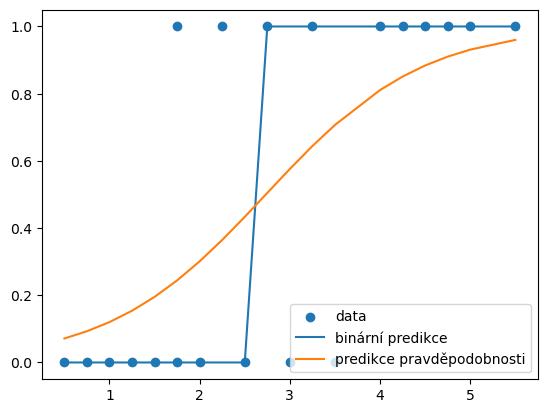

In [73]:
x = np.array(hours).reshape(-1, 1)
y = np.array(passed)

log_model = linear_model.LogisticRegression()
log_model.fit(x, y)
binary = log_model.predict(x)
probs = log_model.predict_proba(x)

plt.scatter(x.flatten(), y)
plt.plot(x.flatten(), score)
plt.plot(x.flatten(), probs[:,1])
plt.legend(['data', 'binární predikce', 'predikce pravděpodobnosti'])

Proměnná $x$ nemusí být jednodimenzionalní. Ukážeme to na klasickém souborem dat Iris. Datová sada obsahuje 150 vzorků od každého ze tří druhů květů kosatce (Iris setosa, Iris virginica a Iris versicolor).

U každého vzorku jsou měřeny čtyři vlastnosti:

- Délka kališních lístků v cm
- šířka kališního lístku v cm
- délka okvětních lístků v cm
- Šířka okvětního lístku v cm

Datová sada je původně problémem více tříd, ale odstraněním jedné třídy ji převedeme na binární klasifikační problém. Pro názornost použijeme jenom 2 vlastností květu.

Text(0.5, 1.0, 'Rozhodovací  hranice binární logistické regrese')

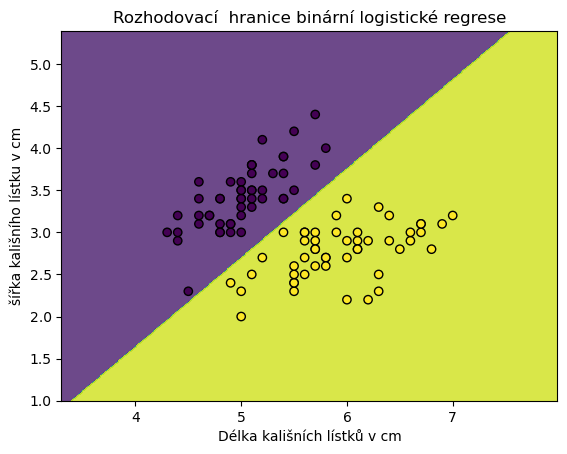

In [76]:
# Stahneme dataset Iris
iris = load_iris()
from sklearn.datasets import load_iris
X, y = iris.data[:, :2], iris.target  # pouzijeme jenom 2 vlastnosti pro vizualizaci

# Prevedeme na binarni klasifikacni problem
X, y = X[y != 2], y[y != 2]

# Rozdelime dataset na trenovaci a testovaci sady
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializujeme model a nafitujeme data
logistic_model = LogisticRegression()
logistic_model.fit(X_train, y_train)

# Nakreslime rozhodovaci hranici
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

Z = logistic_model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', linewidth=1)
plt.xlabel('Délka kališních lístků v cm')
plt.ylabel('šířka kališního lístku v cm')
plt.title('Rozhodovací  hranice binární logistické regrese')
plt.show()

## Support Vector machines (SVM)

Support Vector Machines se používají především pro klasifikaci, i když je lze použít i pro regresní úlohy. Základní myšlenkou je nalezení hyperplochy, která nejlépe odděluje různé třídy dat. Ve dvou rozměrech je hyperrovinou přímka. 

### Základní matematika
Rovnice hyperplochy je:

$$ w \cdot x + b = 0 $$

Zde $w$ je váhový vektor, $x$ je vektor vlastností a $b$ je tzv. bias.

V SVM je cílem maximalizovat vzdálenost (margin) mezi nejbližšími body (support vectors) různých tříd k hyperrovině. Matematicky lze tuto vzdalenost $$M$$ definovat jako:

$$ M = \frac{2}{||w||} $$

Cílem pak je:

$$
\text{Maximalizovat } \frac{2}{||w||} \text{ s podmínkou } y_i(w \cdot x_i + b) \geq 1, \forall i
$$
Předpokládejme 2D případ se dvěma třídami datových bodů:


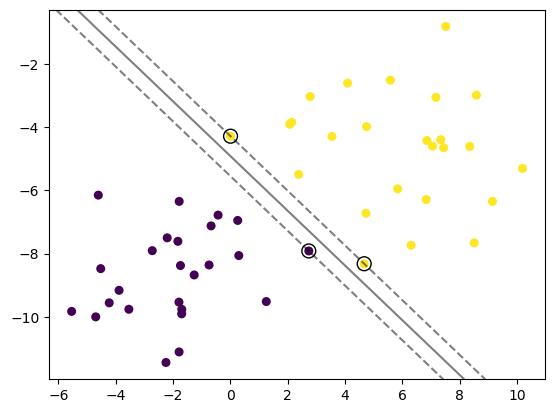

In [81]:
from sklearn.svm import SVC
from sklearn.datasets import make_blobs

# Vytvořte syntetickou datovou sadu
X, y = make_blobs(n_samples=50, n_features=2, centers=2, cluster_std=2, random_state=40)

# Vhodný model SVM
clf = SVC(kernel='linear', C=1000)
clf.fit(X, y)

# Vykreslení datových bodů
plt.scatter(X[:, 0], X[:, 1], c=y, s=30)

# Vykreslení rozhodovací hranice
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

# Vytvoření mřížky pro vyhodnocení modelu
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Vykreslete rozhodovací hranici a okraje
ax.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5,
           linestyles=['--', '-', '--'])

# Vykreslete podpůrné vektory
ax.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1], s=100,
           linewidth=1, facecolors='none', edgecolors='k')

plt.show()

## K-Nejbližší sousedé
Algoritmus k-Nejbližší sousedé (k-nearest neighbours, k-NN) je jednoduchá, intuitivní metoda. Při zadání nového, neznámého pozorování funguje k-NN tak, že identifikuje $k$ vzorků z trénovacího souboru dat, které jsou pozorování nejblíže, a poté vypíše nejčastější výstupní hodnotu z $k$ vzorků pro klasifikaci nebo průměr pro regresi.

### Základní matematika
Jádro algoritmu k-NN závisí na měření vzdálenosti mezi body v prostoru příznaků. Běžně používanou metrikou vzdálenosti je euklidovská vzdálenost pro dva body $A$ a $B$ v $n$-rozměrném prostoru, definovaná jako:

$$ D(A, B) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2 + \ldots + (z_1 - z_2)^2} $$

### Kroky algoritmu
1. Zvolte číslo $k$ a metriku vzdálenosti (často euklidovskou).
2. Najděte $k$ nejbližších sousedů bodu, který chcete klasifikovat.
3. Pro klasifikaci zvolte většinový hlas z $k$ sousedů. Pro regresi vezměte průměr.

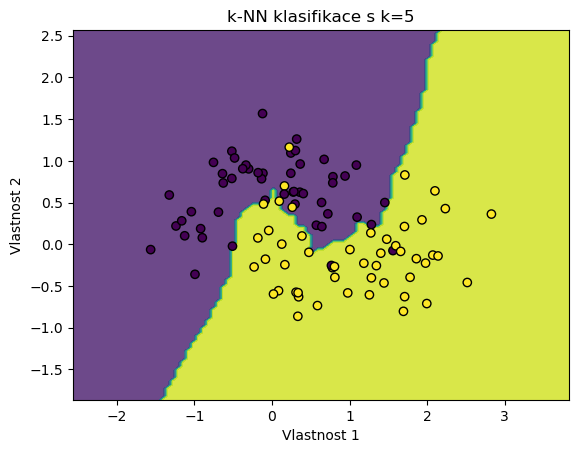

In [83]:
from sklearn.datasets import make_moons
from sklearn.neighbors import KNeighborsClassifier

# Vytvořte syntetická data
X, y = make_moons(n_samples=100, noise=0.3, random_state=42)

# Inicializujte k-NN klasifikátor s k=5
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X, y)

# Vizualizace
xx, yy = np.meshgrid(np.linspace(X[:, 0].min()-1, X[:, 0].max()+1, 100),
                     np.linspace(X[:, 1].min()-1, X[:, 1].max()+1, 100))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', linewidth=1)
plt.xlabel('Vlastnost 1')
plt.ylabel('Vlastnost 2')
plt.title('k-NN klasifikace s k=5')
plt.show()